# Florian Wirtz 23/24 vs Lionel Messi 22/23

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt

*Bayer Leverkusen 23/24*

In [2]:
matches = sb.matches(competition_id=9,season_id=281)

In [3]:
bayer_leverkusen_matches = matches[(matches['home_team'] == 'Bayer Leverkusen') | (matches['away_team'] == 'Bayer Leverkusen')]

*Analysis of Florian Wirtz's shots*

In [4]:
wirtz_shots = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_shots = sb.events(match_id=match_id, split=True, flatten_attrs=False)["shots"]
    wirtz_shots_match = match_shots[match_shots['player_id'] == 40724]
    wirtz_shots = pd.concat([wirtz_shots, wirtz_shots_match])

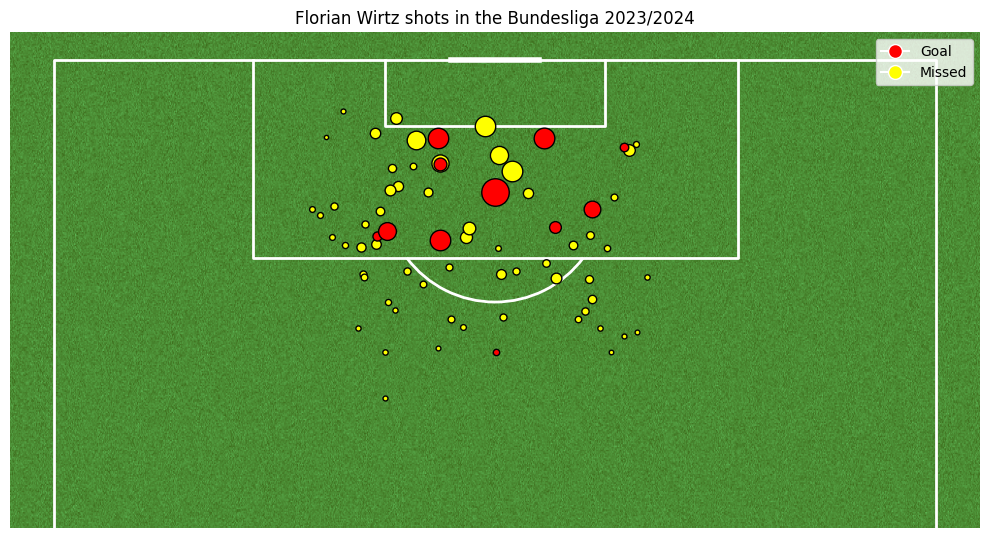

In [5]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

ax.set_ylim(77.5, 122.5)

for i in range(len(wirtz_shots)):
    x = wirtz_shots.iloc[i]['location'][0]
    y = wirtz_shots.iloc[i]['location'][1]
    if wirtz_shots.iloc[i]['shot']['outcome']['name'] == 'Goal':
        pitch.scatter(x, y, ax=ax, color='red', edgecolors='black', zorder=2, s=wirtz_shots.iloc[i]['shot']['statsbomb_xg']*500)
    else:
        pitch.scatter(x, y, ax=ax, color='yellow', edgecolors='black', zorder=1, s=wirtz_shots.iloc[i]['shot']['statsbomb_xg']*500)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Goal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Missed')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Florian Wirtz shots in the Bundesliga 2023/2024')
plt.show()

*Analysis of Florian Wirtz's passes*

In [6]:
wirtz_passes = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_passes = sb.events(match_id=match_id, split=True, flatten_attrs=False)["passes"]
    wirtz_passes_match = match_passes[match_passes['player_id'] == 40724]
    wirtz_passes = pd.concat([wirtz_passes, wirtz_passes_match])

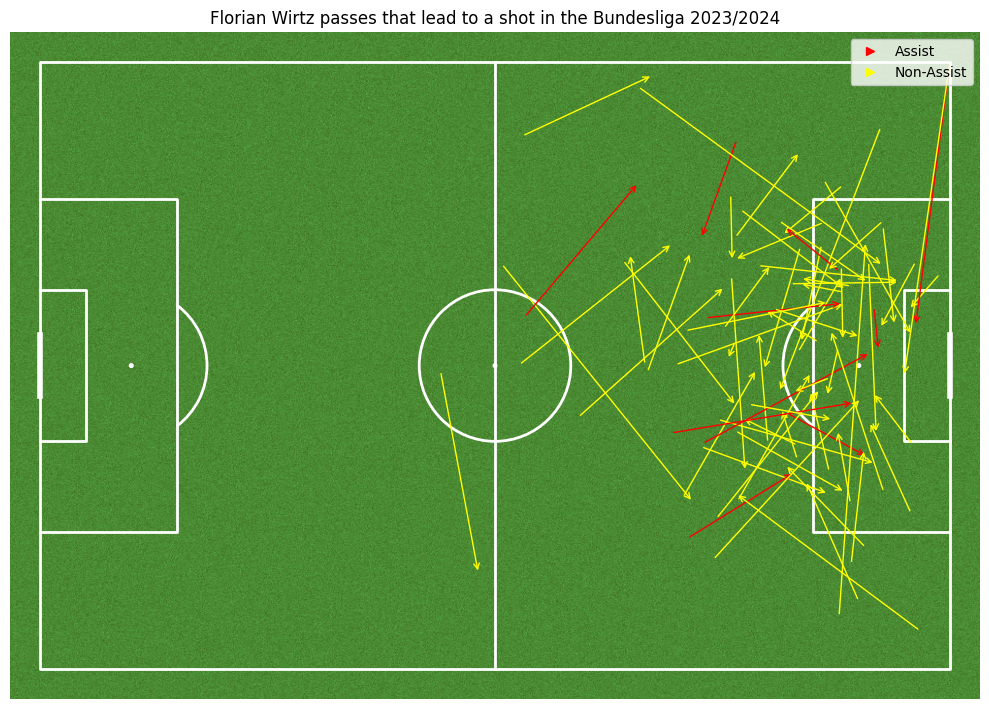

In [7]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

for i in range(len(wirtz_passes)):
    if 'assisted_shot_id' in wirtz_passes.iloc[i]['pass']:
        x_start = wirtz_passes.iloc[i]['location'][0]
        y_start = wirtz_passes.iloc[i]['location'][1]
        x_end = wirtz_passes.iloc[i]['pass']['end_location'][0]
        y_end = wirtz_passes.iloc[i]['pass']['end_location'][1]
        shots = sb.events(match_id=wirtz_passes.iloc[i]['match_id'], split=True, flatten_attrs=False)["shots"]
        shot = shots[shots['id'] == wirtz_passes.iloc[i]['pass']['assisted_shot_id']]
        if shot.iloc[0]['shot']['outcome']['name'] == 'Goal':
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='red'))
        else:
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='yellow'))

red_arrow = Line2D([0], [0], linestyle='none', marker='>', color='red', label='Assist')
yellow_arrow = Line2D([0], [0], linestyle='none', marker='>', color='yellow', label='Non-Assist')
plt.legend(handles=[red_arrow, yellow_arrow])

plt.title('Florian Wirtz passes that lead to a shot in the Bundesliga 2023/2024')
plt.show()

*Paris Saint-Germain 22/23*

In [8]:
matches = sb.matches(competition_id=7,season_id=235)

In [9]:
psg_matches = matches[(matches['home_team'] == 'Paris Saint-Germain') | (matches['away_team'] == 'Paris Saint-Germain')]

*Analysis of Lionel Messi's shots*

In [10]:
messi_shots = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_shots = sb.events(match_id=match_id, split=True, flatten_attrs=False)["shots"]
    messi_shots_match = match_shots[match_shots['player_id'] == 5503]
    messi_shots = pd.concat([messi_shots, messi_shots_match])

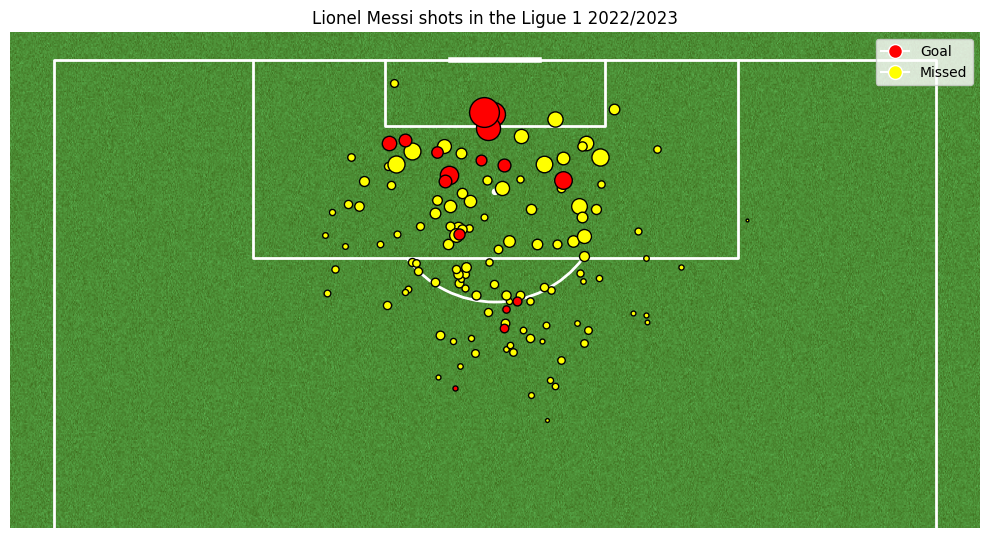

In [11]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

ax.set_ylim(77.5, 122.5)

for i in range(len(messi_shots)):
    x = messi_shots.iloc[i]['location'][0]
    y = messi_shots.iloc[i]['location'][1]
    if messi_shots.iloc[i]['shot']['outcome']['name'] == 'Goal':
        pitch.scatter(x, y, ax=ax, color='red', edgecolors='black', zorder=2, s=messi_shots.iloc[i]['shot']['statsbomb_xg']*500)
    else:
        pitch.scatter(x, y, ax=ax, color='yellow', edgecolors='black', zorder=1, s=messi_shots.iloc[i]['shot']['statsbomb_xg']*500)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Goal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Missed')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Lionel Messi shots in the Ligue 1 2022/2023')
plt.show()

*Analysis of Lionel Messi's passes*

In [12]:
messi_passes = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_passes = sb.events(match_id=match_id, split=True, flatten_attrs=False)["passes"]
    messi_passes_match = match_passes[match_passes['player_id'] == 5503]
    messi_passes = pd.concat([messi_passes, messi_passes_match])

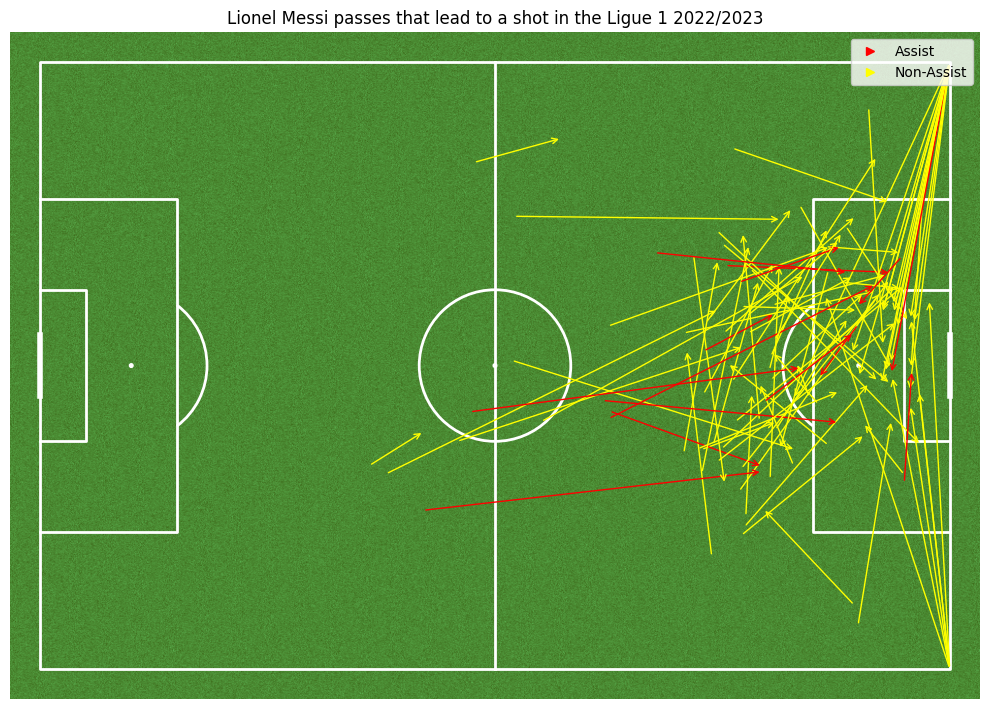

In [13]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

for i in range(len(messi_passes)):
    if 'assisted_shot_id' in messi_passes.iloc[i]['pass']:
        x_start = messi_passes.iloc[i]['location'][0]
        y_start = messi_passes.iloc[i]['location'][1]
        x_end = messi_passes.iloc[i]['pass']['end_location'][0]
        y_end = messi_passes.iloc[i]['pass']['end_location'][1]
        shots = sb.events(match_id=messi_passes.iloc[i]['match_id'], split=True, flatten_attrs=False)["shots"]
        shot = shots[shots['id'] == messi_passes.iloc[i]['pass']['assisted_shot_id']]
        if shot.iloc[0]['shot']['outcome']['name'] == 'Goal':
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='red'))
        else:
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='yellow'))

red_arrow = Line2D([0], [0], linestyle='none', marker='>', color='red', label='Assist')
yellow_arrow = Line2D([0], [0], linestyle='none', marker='>', color='yellow', label='Non-Assist')
plt.legend(handles=[red_arrow, yellow_arrow])

plt.title('Lionel Messi passes that lead to a shot in the Ligue 1 2022/2023')
plt.show()

*Comparison of Lionel Messi 22/23 and Florian Wirtz 23/24*

In [14]:
messi_stats = {}

In [15]:
messi_matchs_played = 0

for i in range(len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_lineups = sb.lineups(match_id=match_id)
    if match_lineups['Paris Saint-Germain']['player_name'].str.contains('Lionel Andrés Messi Cuccittini').any():
        messi_matchs_played += 1

In [16]:
messi_matchs_played = 2842 / 90 # Dataset is incomplete so we have to do this manually

In [17]:
messi_xA = 0
messi_occasions_created = 0
messi_assists = 0

for i in range(len(messi_passes)):
    if 'assisted_shot_id' in messi_passes.iloc[i]['pass']:
        shots = sb.events(match_id=messi_passes.iloc[i]['match_id'], split=True, flatten_attrs=False)["shots"]
        shot = shots[shots['id'] == messi_passes.iloc[i]['pass']['assisted_shot_id']]
        messi_xA += shot.iloc[0]['shot']['statsbomb_xg']
        messi_occasions_created += 1
        if shot.iloc[0]['shot']['outcome']['name'] == 'Goal':
            messi_assists += 1

In [18]:
messi_stats['Assists'] = messi_assists / messi_matchs_played
messi_stats['Occasions created'] = messi_occasions_created / messi_matchs_played

In [19]:
messi_xG = 0
messi_goals = 0

for i in range(len(messi_shots)):
    messi_xG += messi_shots.iloc[i]['shot']['statsbomb_xg']
    if messi_shots.iloc[i]['shot']['outcome']['name'] == 'Goal':
        messi_goals += 1

In [20]:
messi_stats['Goals'] = messi_goals / messi_matchs_played

In [21]:
messi_dribbles = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_dribbles = sb.events(match_id=match_id, split=True, flatten_attrs=False)["dribbles"]
    messi_dribbles_match = match_dribbles[match_dribbles['player_id'] == 5503]
    messi_dribbles = pd.concat([messi_dribbles, messi_dribbles_match])

In [22]:
messi_successful_dribbles = 0
messi_failed_dribbles = 0

for i in range(len(messi_dribbles)):
    if messi_dribbles.iloc[i]['dribble']['outcome']['name'] == 'Complete':
        messi_successful_dribbles += 1
    else:
        messi_failed_dribbles += 1

In [23]:
messi_stats['Successful dribbles'] = messi_successful_dribbles / messi_matchs_played
messi_stats['Dribble success rate'] = messi_successful_dribbles / (messi_successful_dribbles + messi_failed_dribbles) * 100

In [24]:
messi_ball_receipts = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_ball_receipts = sb.events(match_id=match_id, split=True, flatten_attrs=False)["ball_receipts"]
    messi_ball_receipts_match = match_ball_receipts[match_ball_receipts['player_id'] == 5503]
    messi_ball_receipts = pd.concat([messi_ball_receipts, messi_ball_receipts_match])

In [25]:
messi_stats['Ball receipts'] = len(messi_ball_receipts) / messi_matchs_played

In [26]:
messi_foul_won = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_foul_won = sb.events(match_id=match_id, split=True, flatten_attrs=False)["foul_wons"]
    messi_foul_won_match = match_foul_won[match_foul_won['player_id'] == 5503]
    messi_foul_won = pd.concat([messi_foul_won, messi_foul_won_match])

In [27]:
messi_stats['Foul wons'] = len(messi_foul_won) / messi_matchs_played

In [28]:
messi_duels = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_duels = sb.events(match_id=match_id, split=True, flatten_attrs=False)["duels"]
    messi_duels_match = match_duels[match_duels['player_id'] == 5503]
    messi_duels = pd.concat([messi_duels, messi_duels_match])

In [29]:
messi_duels_won = 0
messi_duels_lost = 0

for i in range (len(messi_duels)):
    if 'outcome' in messi_duels.iloc[i]['duel']:
        if messi_duels.iloc[i]['duel']['outcome']['name'] == 'Won' or messi_duels.iloc[i]['duel']['outcome']['name'] == 'Success In Play':
            messi_duels_won += 1
        else:
            messi_duels_lost += 1
    else:
        messi_duels_lost += 1

In [30]:
messi_stats['Duels won'] = messi_duels_won / messi_matchs_played
messi_stats['Duels won rate'] = messi_duels_won / (messi_duels_won + messi_duels_lost) * 100

In [31]:
messi_carrys = pd.DataFrame()

for i in range (len(psg_matches)):
    match_id = psg_matches.iloc[i]['match_id']
    match_carrys = sb.events(match_id=match_id, split=True, flatten_attrs=False)["carrys"]
    messi_carrys_match = match_carrys[match_carrys['player_id'] == 5503]
    messi_carrys = pd.concat([messi_carrys, messi_carrys_match])

In [32]:
messi_progressive_distance = 0

for i in range(len(messi_carrys)):
    start_location = messi_carrys.iloc[i]['location']
    end_location = messi_carrys.iloc[i]['carry']['end_location']
    distance = ((end_location[0] - start_location[0])**2 + (end_location[1] - start_location[1])**2)**0.5
    messi_progressive_distance += distance

In [33]:
messi_stats['Progressive distance'] = messi_progressive_distance / messi_matchs_played

In [34]:
wirtz_stats = {}

In [35]:
wirtz_matchs_played = 0

for i in range(len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_lineups = sb.lineups(match_id=match_id)
    if match_lineups['Bayer Leverkusen']['player_name'].str.contains('Florian Wirtz').any():
        wirtz_matchs_played += 1

In [36]:
wirtz_matchs_played = 2377 / 90 # Dataset is incomplete so we have to do this manually

In [37]:
wirtz_xA = 0
wirtz_occasions_created = 0
wirtz_assists = 0

for i in range(len(wirtz_passes)):
    if 'assisted_shot_id' in wirtz_passes.iloc[i]['pass']:
        shots = sb.events(match_id=wirtz_passes.iloc[i]['match_id'], split=True, flatten_attrs=False)["shots"]
        shot = shots[shots['id'] == wirtz_passes.iloc[i]['pass']['assisted_shot_id']]
        wirtz_xA += shot.iloc[0]['shot']['statsbomb_xg']
        wirtz_occasions_created += 1
        if shot.iloc[0]['shot']['outcome']['name'] == 'Goal':
            wirtz_assists += 1

In [38]:
wirtz_stats['Assists'] = wirtz_assists / wirtz_matchs_played
wirtz_stats['Occasions created'] = wirtz_occasions_created / wirtz_matchs_played

In [39]:
wirtz_xG = 0
wirtz_goals = 0

for i in range(len(wirtz_shots)):
    wirtz_xG += wirtz_shots.iloc[i]['shot']['statsbomb_xg']
    if wirtz_shots.iloc[i]['shot']['outcome']['name'] == 'Goal':
        wirtz_goals += 1

In [40]:
wirtz_stats['Goals'] = wirtz_goals / wirtz_matchs_played

In [41]:
wirtz_dribbles = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_dribbles = sb.events(match_id=match_id, split=True, flatten_attrs=False)["dribbles"]
    wirtz_dribbles_match = match_dribbles[match_dribbles['player_id'] == 40724]
    wirtz_dribbles = pd.concat([wirtz_dribbles, wirtz_dribbles_match])

In [42]:
wirtz_successful_dribbles = 0
wirtz_failed_dribbles = 0

for i in range(len(wirtz_dribbles)):
    if wirtz_dribbles.iloc[i]['dribble']['outcome']['name'] == 'Complete':
        wirtz_successful_dribbles += 1
    else:
        wirtz_failed_dribbles += 1

In [43]:
wirtz_stats['Successful dribbles'] = wirtz_successful_dribbles / wirtz_matchs_played
wirtz_stats['Dribble success rate'] = wirtz_successful_dribbles / (wirtz_successful_dribbles + wirtz_failed_dribbles) * 100

In [44]:
wirtz_ball_receipts = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_ball_receipts = sb.events(match_id=match_id, split=True, flatten_attrs=False)["ball_receipts"]
    wirtz_ball_receipts_match = match_ball_receipts[match_ball_receipts['player_id'] == 40724]
    wirtz_ball_receipts = pd.concat([wirtz_ball_receipts, wirtz_ball_receipts_match])

In [45]:
wirtz_stats['Ball receipts'] = len(wirtz_ball_receipts) / wirtz_matchs_played

In [46]:
wirtz_foul_won = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_foul_won = sb.events(match_id=match_id, split=True, flatten_attrs=False)["foul_wons"]
    wirtz_foul_won_match = match_foul_won[match_foul_won['player_id'] == 40724]
    wirtz_foul_won = pd.concat([wirtz_foul_won, wirtz_foul_won_match])

In [47]:
wirtz_stats['Foul wons'] = len(wirtz_foul_won) / wirtz_matchs_played

In [48]:
wirtz_duels = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_duels = sb.events(match_id=match_id, split=True, flatten_attrs=False)["duels"]
    wirtz_duels_match = match_duels[match_duels['player_id'] == 40724]
    wirtz_duels = pd.concat([wirtz_duels, wirtz_duels_match])

In [49]:
wirtz_duels_won = 0
wirtz_duels_lost = 0

for i in range (len(wirtz_duels)):
    if 'outcome' in wirtz_duels.iloc[i]['duel']:
        if wirtz_duels.iloc[i]['duel']['outcome']['name'] == 'Won' or wirtz_duels.iloc[i]['duel']['outcome']['name'] == 'Success In Play':
            wirtz_duels_won += 1
        else:
            wirtz_duels_lost += 1
    else:
        wirtz_duels_lost += 1

In [50]:
wirtz_stats['Duels won'] = wirtz_duels_won / wirtz_matchs_played
wirtz_stats['Duels won rate'] = wirtz_duels_won / (wirtz_duels_won + wirtz_duels_lost) * 100

In [51]:
wirtz_carrys = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_carrys = sb.events(match_id=match_id, split=True, flatten_attrs=False)["carrys"]
    wirtz_carrys_match = match_carrys[match_carrys['player_id'] == 40724]
    wirtz_carrys = pd.concat([wirtz_carrys, wirtz_carrys_match])

In [52]:
wirtz_progressive_distance = 0

for i in range(len(wirtz_carrys)):
    start_location = wirtz_carrys.iloc[i]['location']
    end_location = wirtz_carrys.iloc[i]['carry']['end_location']
    distance = ((end_location[0] - start_location[0])**2 + (end_location[1] - start_location[1])**2)**0.5
    wirtz_progressive_distance += distance

In [53]:
wirtz_stats['Progressive distance'] = wirtz_progressive_distance / wirtz_matchs_played

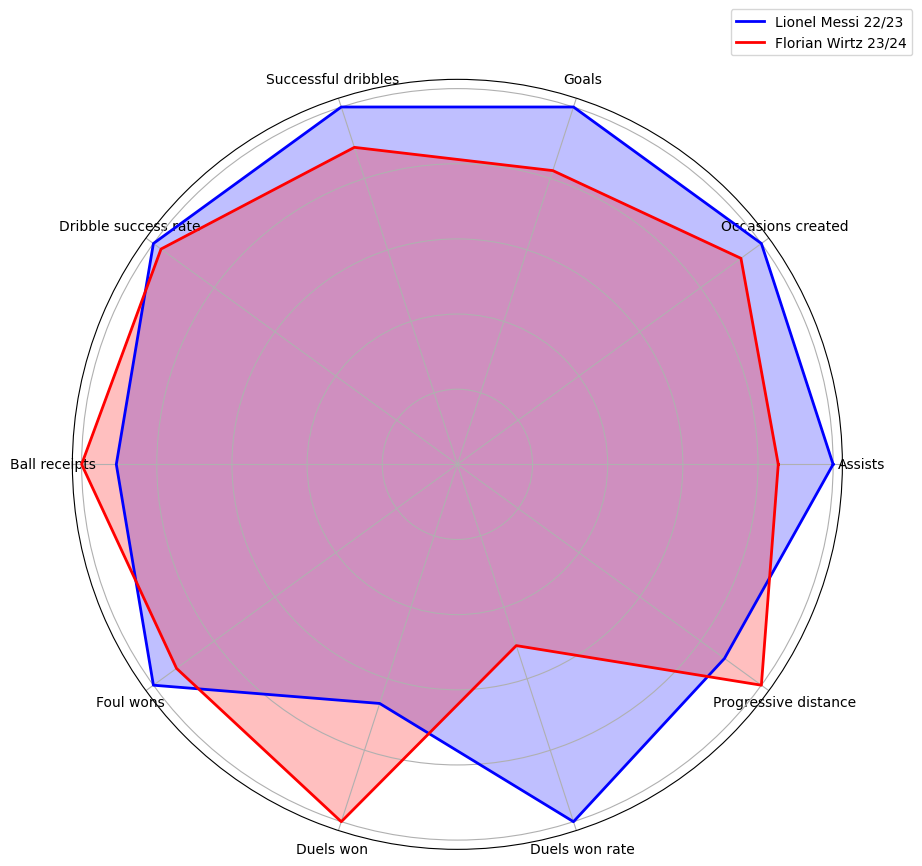

In [54]:
# Attributs à comparer
attributes = list(messi_stats.keys())

# Valeurs des attributs pour Messi et Wirtz
messi_values = np.array(list(messi_stats.values()))
wirtz_values = np.array(list(wirtz_stats.values()))

# Création du graphique hexagonal
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i in range(num_vars):
    # Choix de l'échelle max pour chaque attribut
    max_value = max(messi_values[i], wirtz_values[i])
    
    # Normalisation des valeurs pour cet attribut
    messi_values[i] /= max_value
    wirtz_values[i] /= max_value

messi_values = np.concatenate((messi_values, [messi_values[0]]))
wirtz_values = np.concatenate((wirtz_values, [wirtz_values[0]]))

ax.fill(angles, messi_values, color='blue', alpha=0.25)
ax.fill(angles, wirtz_values, color='red', alpha=0.25)

ax.plot(angles, messi_values, color='blue', linewidth=2, linestyle='solid', label='Lionel Messi 22/23')
ax.plot(angles, wirtz_values, color='red', linewidth=2, linestyle='solid', label='Florian Wirtz 23/24')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes, fontsize=10)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()